#Linear regression with multiple veriabe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [124]:
data=pd.read_csv('/content/taxi_trip_pricing.csv')
data

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


#Data preprocessing

In [125]:
data= data[['Trip_Distance_km', 'Per_Km_Rate','Trip_Duration_Minutes','Trip_Price']]
data

,Trip_Distance_km,Per_Km_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,0.80,53.82,36.2624
1,47.59,0.62,40.57,NaN
2,36.87,1.21,37.27,52.9032
3,30.33,0.51,116.81,36.4698
4,NaN,0.63,22.64,15.6180
...,...,...,...,...
995,5.49,0.62,58.39,34.4049
996,45.95,0.61,61.96,62.1295
997,7.70,1.78,54.18,33.1236
998,47.56,0.82,114.94,61.2090


In [126]:
data.isnull().sum()

,0
Trip_Distance_km,50
Per_Km_Rate,50
Trip_Duration_Minutes,50
Trip_Price,49


In [127]:
data['Trip_Distance_km'].fillna(data['Trip_Distance_km'].median(),inplace=True)
data['Trip_Price'].fillna(data['Trip_Price'].median(),inplace=True)
data['Per_Km_Rate'].fillna(data['Per_Km_Rate'].median(),inplace=True)
data['Trip_Duration_Minutes'].fillna(data['Trip_Duration_Minutes'].median(),inplace=True)

In [128]:
data.isnull().sum()

,0
Trip_Distance_km,0
Per_Km_Rate,0
Trip_Duration_Minutes,0
Trip_Price,0


#finding outlier

In [129]:
Q1 = data['Trip_Distance_km'].quantile(0.25)
Q3 = data['Trip_Distance_km'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data= data[(data['Trip_Distance_km'] >= lower_bound) & (data['Trip_Distance_km'] <= upper_bound)]

Q1 = data['Trip_Price'].quantile(0.25)
Q3 = data['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data= data[(data['Trip_Price'] >= lower_bound) & (data['Trip_Price'] <= upper_bound)]

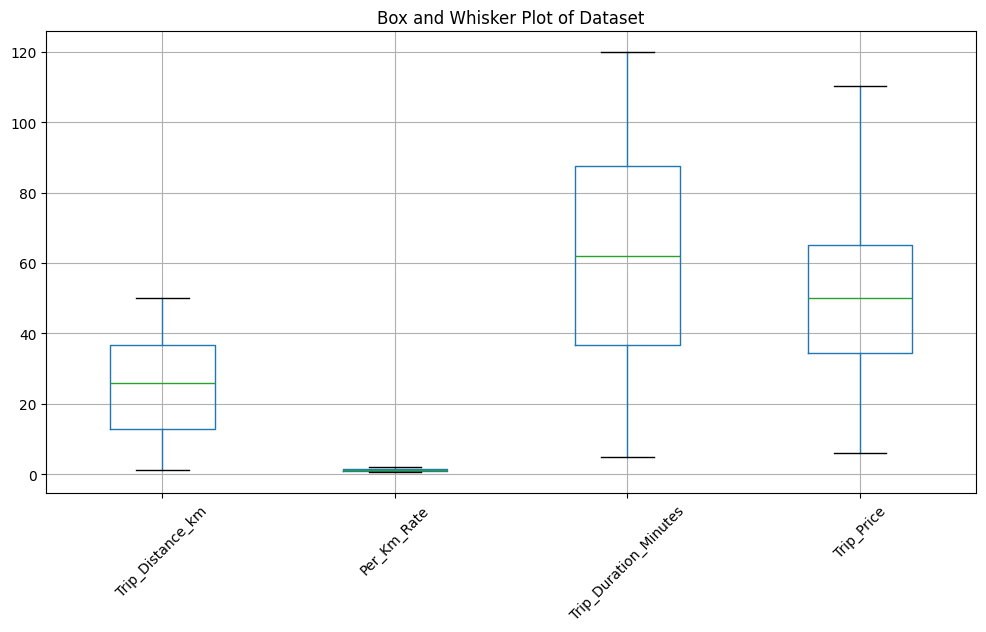

In [130]:
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title('Box and Whisker Plot of Dataset')
plt.xticks(rotation=45)
plt.show()

In [131]:
data.describe()

,Trip_Distance_km,Per_Km_Rate,Trip_Duration_Minutes,Trip_Price
count,970.000000,970.000000,970.000000,970.000000
mean,24.914443,1.224330,61.794412,51.340326
std,13.950171,0.414964,31.445966,22.441371
min,1.230000,0.500000,5.010000,6.126900
25%,12.852500,0.870000,36.582500,34.318600
50%,25.830000,1.220000,61.860000,50.074500
75%,36.710000,1.560000,87.477500,65.187950
max,49.990000,2.000000,119.840000,110.254400


In [132]:
X = data[["Trip_Distance_km","Per_Km_Rate","Trip_Duration_Minutes"]]
y = data["Trip_Price"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [134]:
model = LinearRegression()

In [135]:
model.fit(X_train,y_train)

LinearRegression()

In [136]:
y_pred = model.predict(X_test)

In [137]:
MSE=mean_squared_error(y_test,y_pred)
MSE

132.6830648044136

In [138]:
np.sqrt(MSE)

11.518813515480385

In [139]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.11220816 22.4338134   0.25484356]
Intercept: -19.668239084501693


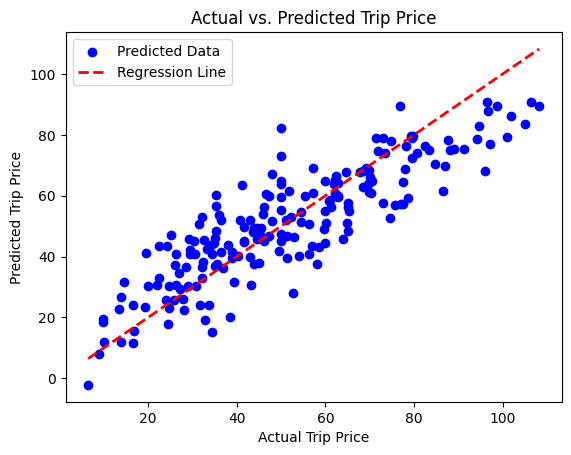

In [140]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.title('Actual vs. Predicted Trip Price')
plt.legend()
plt.show()